# 1. Kütüphanelerin Yüklenmesi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# 2. Veri Setini Yükleme

In [3]:
# Customer Churn verisetini yükleyelim
dataset = load_dataset("d0r1h/customer_churn")
df = dataset["train"].to_pandas()

# Pandas ayarlarını yaparak tüm sütunların görünmesini sağlıyoruz
pd.set_option('display.max_columns', None)

In [4]:
# İlk 10 satıra bakalım
df.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,08-01-2016,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,6:46:07,23,433.62,13884.77,24,722.27,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,19-03-2015,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50,28,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,None,No Membership,12-07-2016,?,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19,429.11,44554.82,24,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,14-12-2016,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15,191.07,18362.31,20,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,30-11-2016,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,19:10:16,10,97.31,19244.16,28,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1


In [5]:
# Veri hakkında bilgi alalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

# 3. Gereksiz Sütunların Düşürülmesi

In [6]:
# Analiz için kullanılmayacak sütunları düşürüyoruz
df.drop(['security_no', 'referral_id', 'last_visit_time'], axis=1, inplace=True)

# 4. Geçersiz Değerlerin Kontrolü ve Düzeltilmesi

In [7]:
# Veri setindeki 'null' veya '?' gibi geçersiz değerleri 'NaN' ile değiştireceğiz
invalid_values_count = df.isin(['null', '?']).sum().sum()
print(f"Toplam geçersiz değer sayısı: {invalid_values_count}")

Toplam geçersiz değer sayısı: 10831


In [8]:
# 'null' ve '?' değerlerini NaN ile değiştirelim
df.replace({'null': np.nan, '?': np.nan}, inplace=True)

# 5. Eksik Verilerin Kontrolü ve Doldurulması

In [9]:
# Eksik değerlerin hangi sütunlarda olduğunu kontrol edelim
df.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [10]:
# Eksik verileri, ilgili sütunun mod veya medyanı ile dolduruyoruz
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].median())

In [11]:
# Eksik değerleri kontrol edelim
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

# 6. Tarih Formatı ve Kodlama

In [12]:
# Tarih sütununu doğru formatta datetime türüne çeviriyoruz
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%d-%m-%Y')

In [13]:
# 'joined_through_referral' sütununu binary olarak kodluyoruz
df['joined_through_referral'] = df['joined_through_referral'].map({'Yes': 1, 'No': 0})

In [14]:
# 'avg_frequency_login_days' sütununu sayısal değerlere dönüştürüyoruz
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

# Eksik olan 'avg_frequency_login_days' verisini medyan ile dolduruyoruz
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].median())

In [15]:
# Veri tipi değişikliklerinin sonucunu kontrol ediyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   age                           36992 non-null  int64         
 1   gender                        36992 non-null  object        
 2   region_category               36992 non-null  object        
 3   membership_category           36992 non-null  object        
 4   joining_date                  36992 non-null  datetime64[ns]
 5   joined_through_referral       36992 non-null  int64         
 6   preferred_offer_types         36992 non-null  object        
 7   medium_of_operation           36992 non-null  object        
 8   internet_option               36992 non-null  object        
 9   days_since_last_login         36992 non-null  int64         
 10  avg_time_spent                36992 non-null  float64       
 11  avg_transaction_value       

# 7. Kategorik Verilerin İncelenmesi

In [16]:
# Kategorik sütunların benzersiz değerlerini görmek için fonksiyon yazıyoruz
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':  # Sadece kategorik sütunlar
            print(f'{column}:')
            unique_values = df[column].unique()  # Benzersiz değerler
            for i, value in enumerate(unique_values, start=1):
                print(f'{i}. {value}')
            print()  # Sütunlar arasına boşluk eklemek için

print_unique_col_values(df)

gender:
1. F
2. M
3. Unknown

region_category:
1. Village
2. City
3. Town

membership_category:
1. Platinum Membership
2. Premium Membership
3. No Membership
4. Gold Membership
5. Silver Membership
6. Basic Membership

preferred_offer_types:
1. Gift Vouchers/Coupons
2. Credit/Debit Card Offers
3. Without Offers

medium_of_operation:
1. Desktop
2. Smartphone
3. Both

internet_option:
1. Wi-Fi
2. Mobile_Data
3. Fiber_Optic

used_special_discount:
1. Yes
2. No

offer_application_preference:
1. Yes
2. No

past_complaint:
1. No
2. Yes

complaint_status:
1. Not Applicable
2. Solved
3. Solved in Follow-up
4. Unsolved
5. No Information Available

feedback:
1. Products always in Stock
2. Quality Customer Care
3. Poor Website
4. No reason specified
5. Poor Product Quality
6. Poor Customer Service
7. Too many ads
8. User Friendly Website
9. Reasonable Price



# 8. Kategorik Verilerin Sayısal Verilere Dönüştürülmesi

In [17]:
# Kategorik verileri sayısal verilere dönüştürüyoruz
df['gender'] = df['gender'].map({'F': 0, 'M': 1, 'Unknown': 2})

df['region_category'] = df['region_category'].map({'Town': 0, 'City': 1, 'Village': 2})

df['medium_of_operation'] = df['medium_of_operation'].map({'Desktop': 0, 'Smartphone': 1, 'Both': 2})

df['internet_option'] = df['internet_option'].map({'Wi-Fi': 0, 'Mobile_Data': 1, 'Fiber_Optic': 2})

df['used_special_discount'] = df['used_special_discount'].map({'No': 0, 'Yes': 1})

df['offer_application_preference'] = df['offer_application_preference'].map({'No': 0, 'Yes': 1})

df['past_complaint'] = df['past_complaint'].map({'No': 0, 'Yes': 1})

In [18]:
df['membership_category'] = df['membership_category'].map({
    'No Membership': 0, 
    'Gold Membership': 1, 
    'Basic Membership': 2, 
    'Silver Membership': 3, 
    'Premium Membership': 4, 
    'Platinum Membership': 5
})

In [19]:
df['preferred_offer_types'] = df['preferred_offer_types'].map({
    'Gift Vouchers/Coupons': 0, 
    'Credit/Debit Card Offers': 1, 
    'Without Offers': 2
})

In [20]:
df['complaint_status'] = df['complaint_status'].map({
    'Solved in Follow-up': 0, 
    'Unsolved': 1, 
    'Solved': 2, 
    'Not Applicable': 3, 
    'No Information Available': 4
})

In [21]:
# Olumlu ve olumsuz geri bildirimleri gruplandırıyoruz
positive_feedback = ['Quality Customer Care', 'User Friendly Website', 'Reasonable Price']
negative_feedback = ['Poor Website', 'Poor Product Quality', 'Too many ads', 'Poor Customer Service']

# Hem 'feedback' hem de 'feedback_sentiment' sütunlarını güncelleyen işlem
df['feedback_sentiment'] = df['feedback'].apply(
    lambda x: 1 if x in positive_feedback else (0 if x in negative_feedback else -1)
)

# 'feedback' sütununu sayısal olarak dönüştürme
df['feedback'] = df['feedback'].apply(
    lambda x: 1 if x in positive_feedback else (0 if x in negative_feedback else -1)
)

In [22]:
df.head(10)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,feedback_sentiment
0,18,0,2,5,2017-08-17,0,0,0,0,17,300.63,53005.25,17.0,781.75,1,1,0,3,-1,0,-1
1,32,0,1,4,2017-08-28,0,0,0,1,16,306.34,12838.38,10.0,697.62,1,0,1,2,1,0,1
2,44,0,0,0,2016-11-11,1,0,0,0,14,516.16,21027.00,22.0,500.69,0,1,1,0,0,1,0
3,37,1,1,0,2016-10-29,1,0,0,1,11,53.27,25239.56,6.0,567.66,0,1,1,1,0,1,0
4,31,0,1,0,2017-09-12,0,1,1,1,20,113.13,24483.66,16.0,663.06,0,1,1,2,0,1,0
5,13,1,1,1,2016-01-08,0,0,0,0,23,433.62,13884.77,24.0,722.27,1,0,1,1,-1,0,-1
6,21,1,0,1,2015-03-19,1,0,0,1,10,55.38,8982.50,28.0,756.21,1,0,1,0,-1,0,-1
7,42,1,0,0,2016-07-12,0,1,2,2,19,429.11,44554.82,24.0,568.08,0,1,1,1,0,1,0
8,44,1,2,3,2016-12-14,0,2,1,2,15,191.07,18362.31,20.0,697.62,1,0,1,0,0,0,0
9,45,0,0,0,2016-11-30,0,0,0,0,10,97.31,19244.16,28.0,706.23,0,1,1,4,0,1,0


# 9. Veri Görselleştirmesi

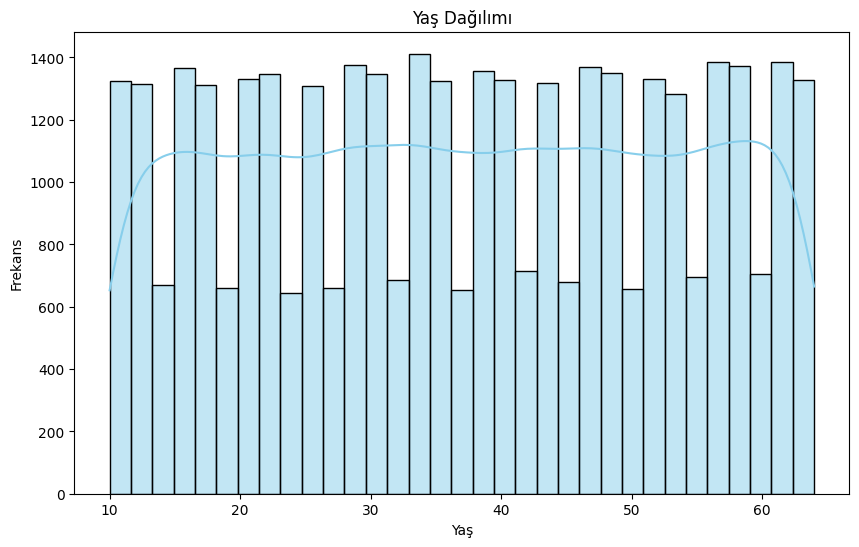

In [23]:
# Yaşın dağılımını görselleştirelim
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

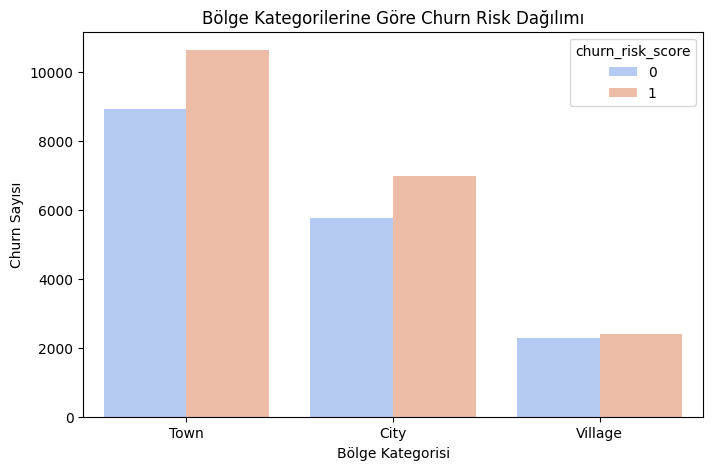

In [24]:
# Bölge kategorilerine göre churn riskini görselleştirelim
plt.figure(figsize=(8, 5))
sns.countplot(x='region_category', hue='churn_risk_score', data=df, palette='coolwarm')
plt.title('Bölge Kategorilerine Göre Churn Risk Dağılımı')
plt.xlabel('Bölge Kategorisi')  # Region category axis label updated
plt.ylabel('Churn Sayısı')  # Count axis label remains the same
plt.xticks(ticks=[0, 1, 2], labels=['Town', 'City', 'Village'])  # Updated x-axis labels
plt.show()

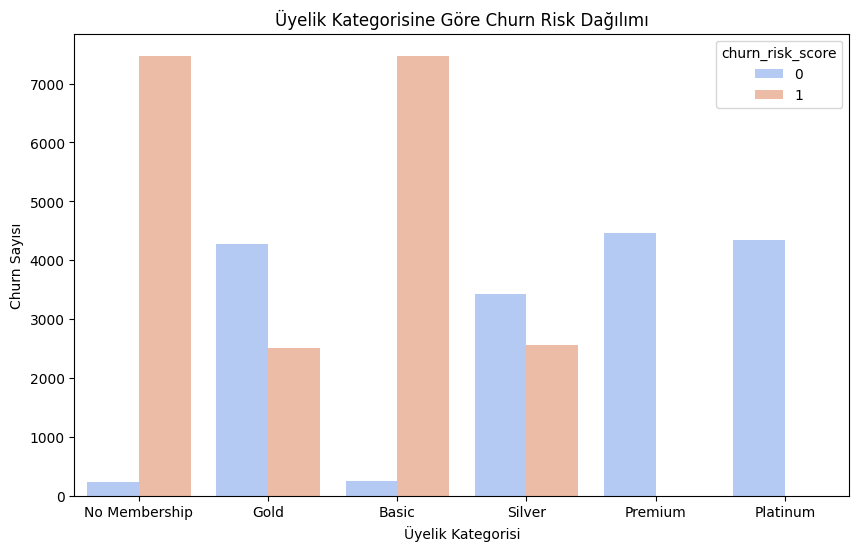

In [25]:
# Üyelik kategorisine göre churn riskini görselleştirelim
plt.figure(figsize=(10, 6))
sns.countplot(x='membership_category', hue='churn_risk_score', data=df, palette='coolwarm')
plt.title('Üyelik Kategorisine Göre Churn Risk Dağılımı')
plt.xlabel('Üyelik Kategorisi')
plt.ylabel('Churn Sayısı')
plt.xticks(ticks=[0, 1, 2 , 3 , 4 , 5], labels=['No Membership', 'Gold', 'Basic' , 'Silver' , 'Premium' , 'Platinum'])
plt.show()

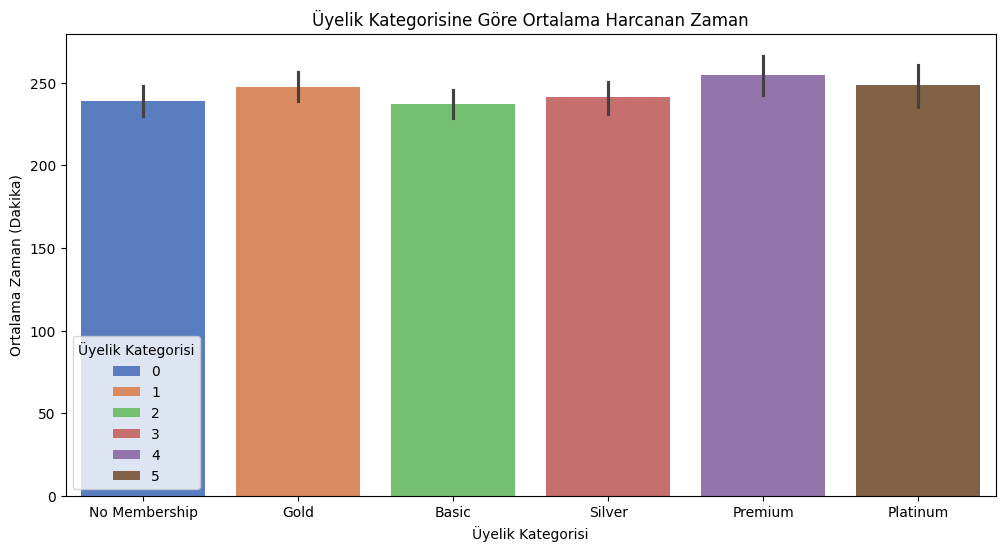

In [26]:
#Üyelik Kategorisine Göre Ortalama Harcanan Zaman
plt.figure(figsize=(12, 6))
sns.barplot(x='membership_category', y='avg_time_spent', data=df, palette='muted', hue='membership_category')
plt.title('Üyelik Kategorisine Göre Ortalama Harcanan Zaman')
plt.xlabel('Üyelik Kategorisi')
plt.ylabel('Ortalama Zaman (Dakika)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['No Membership', 'Gold', 'Basic' , 'Silver' , 'Premium' , 'Platinum'])
plt.legend(title='Üyelik Kategorisi')
plt.show()

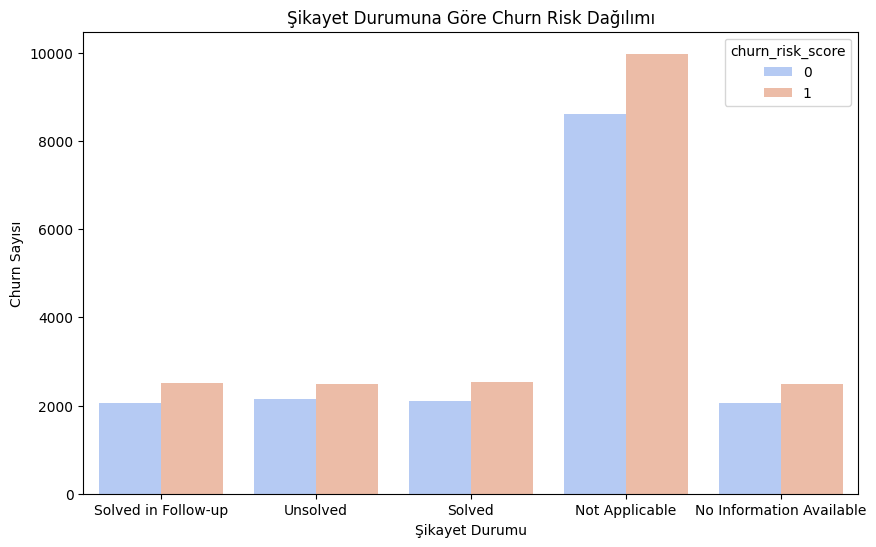

In [27]:
# Şikayet Durumuna Göre Churn Risk Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='complaint_status', hue='churn_risk_score', data=df, palette='coolwarm')
plt.title('Şikayet Durumuna Göre Churn Risk Dağılımı')
plt.xlabel('Şikayet Durumu')
plt.ylabel('Churn Sayısı')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Solved in Follow-up', 'Unsolved', 'Solved', 'Not Applicable', 'No Information Available'])
plt.show()


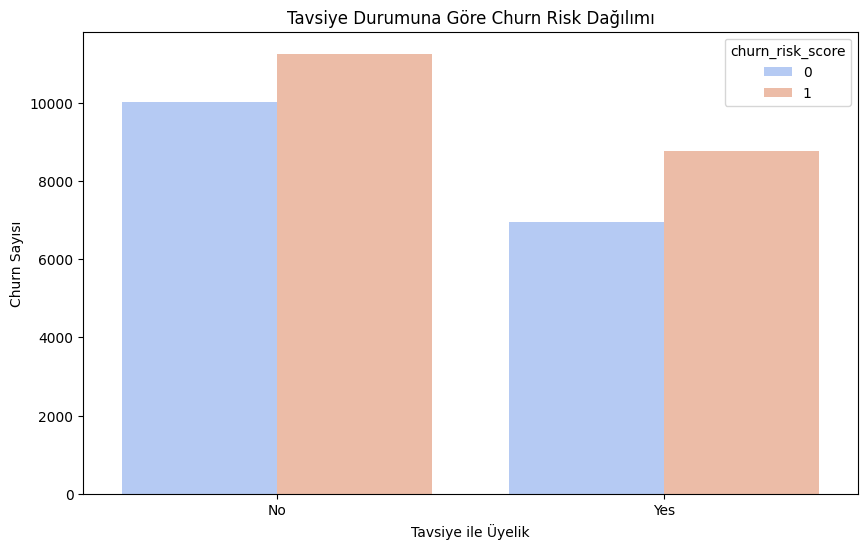

In [28]:
# Tavsiye Durumuna Göre Churn Risk Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x='joined_through_referral', hue='churn_risk_score', data=df, palette='coolwarm')
plt.title('Tavsiye Durumuna Göre Churn Risk Dağılımı')
plt.xlabel('Tavsiye ile Üyelik')
plt.ylabel('Churn Sayısı')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

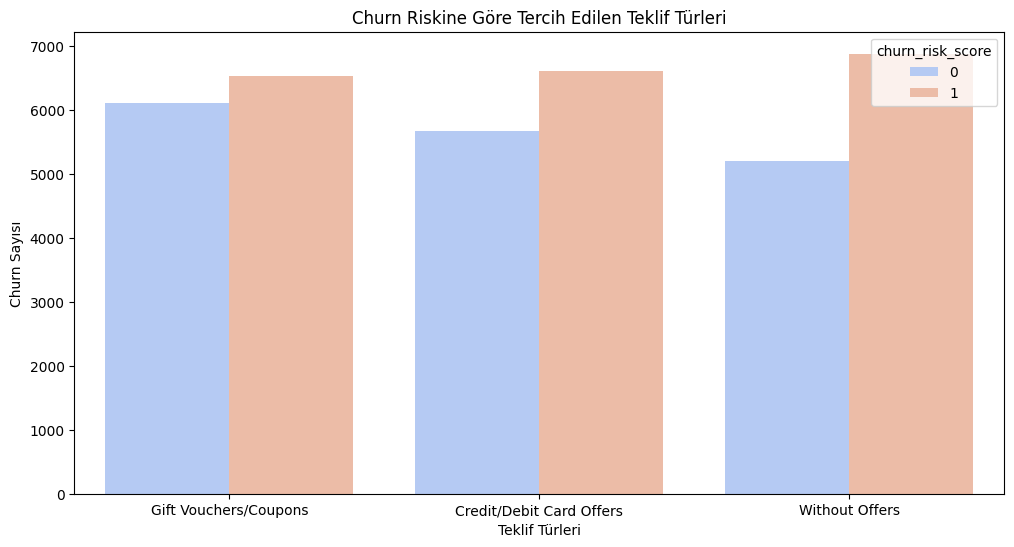

In [29]:
# Churn Riskine Göre Tercih Edilen Teklif Türler
plt.figure(figsize=(12, 6))
sns.countplot(x='preferred_offer_types', hue='churn_risk_score', data=df, palette='coolwarm')
plt.title('Churn Riskine Göre Tercih Edilen Teklif Türleri')
plt.xlabel('Teklif Türleri')
plt.ylabel('Churn Sayısı')
plt.xticks(ticks=[0, 1, 2], labels=['Gift Vouchers/Coupons', 'Credit/Debit Card Offers', 'Without Offers'])
plt.show()

# 10. Veri Setinin Bölünmesi

In [76]:
# Bağımsız ve bağımlı değişkenleri ayıralım
X = df.drop(columns=['churn_risk_score', "joining_date"])
y = df['churn_risk_score']

In [77]:
# Eğitim ve test verisine ayırıyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Özellik Ölçeklendirme

In [78]:
# Veriyi ölçeklendiriyoruz (StandardScaler kullanarak)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 12. Model Değerlendirme Kütüphanelerinin Yüklenmesi

In [79]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 13. Lojistik Regresyon Modeli

In [80]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=2000, random_state=42)

# Lojistik Regresyon Modeli ile test seti üzerinde tahmin yapma
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Model doğruluğunu çapraz doğrulama ile değerlendiriyoruz
logreg_cv_score = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [82]:
print(f'Logistic Regression Modeli için Çapraz Doğrulama Skorları: {logreg_cv_score}')

Logistic Regression Modeli için Çapraz Doğrulama Skorları: [0.79523568 0.80165569 0.79472884 0.80686043 0.80196012]


In [83]:
print(f'Ortalama doğruluk: {logreg_cv_score.mean():.2f}')

Ortalama doğruluk: 0.80


In [84]:
print(f'Lojistik Regresyon Modeli Doğruluğu: {accuracy_score(y_test, y_pred_logreg):.2f}')

Lojistik Regresyon Modeli Doğruluğu: 0.79


In [85]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_logreg)}')

Confusion Matrix:
[[2476  901]
 [ 618 3404]]


## 13.1. Sonuçların Görselleştirilmesi

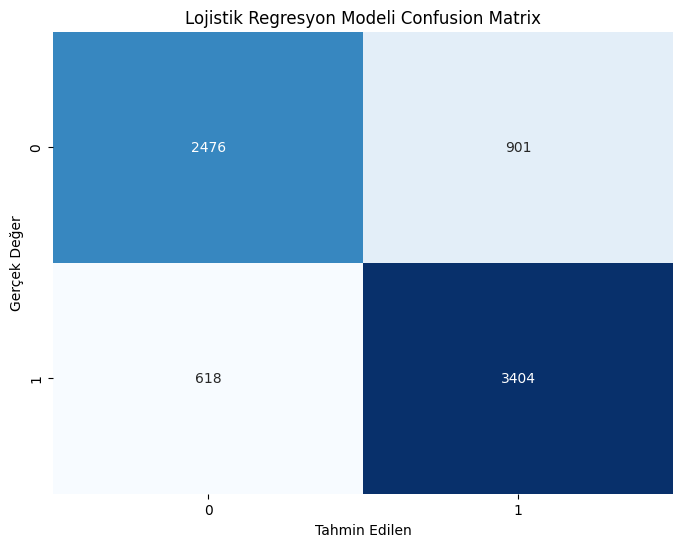

In [101]:
# Modelin performansını değerlendirecek confusion matrix görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Lojistik Regresyon Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

## 13.2. Raporlama

In [91]:
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77      3377
           1       0.79      0.85      0.82      4022

    accuracy                           0.79      7399
   macro avg       0.80      0.79      0.79      7399
weighted avg       0.80      0.79      0.79      7399



# 14. Random Forest Modeli ve Hiperparametre Optimizasyonu

In [103]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# En iyi hiperparametreleri yazdırıyoruz
print(f'En iyi hiperparametreler: {grid_search.best_params_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi hiperparametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [105]:
# En iyi model ile tahmin yapıyoruz
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_rf_binary = (y_pred_rf > 0.5).astype(int)

# Modelin doğruluğunu çapraz doğrulama ile değerlendiriyoruz
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [106]:
print(f'Random Forest Modeli Doğruluğu: {accuracy_score(y_test, y_pred_rf_binary):.2f}')

Random Forest Modeli Doğruluğu: 0.93


In [108]:
print(f'Çapraz Doğrulama Skorları: {cv_scores}')

Çapraz Doğrulama Skorları: [0.92752154 0.92464943 0.93140733 0.92987496 0.93409936]


In [109]:
print(f'Ortalama Çapraz Doğrulama Skoru: {cv_scores.mean():.2f}')

Ortalama Çapraz Doğrulama Skoru: 0.93


In [110]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf_binary)}')

Confusion Matrix:
[[2986  391]
 [ 160 3862]]


## 14.1. Sonuçların Görselleştirilmesi

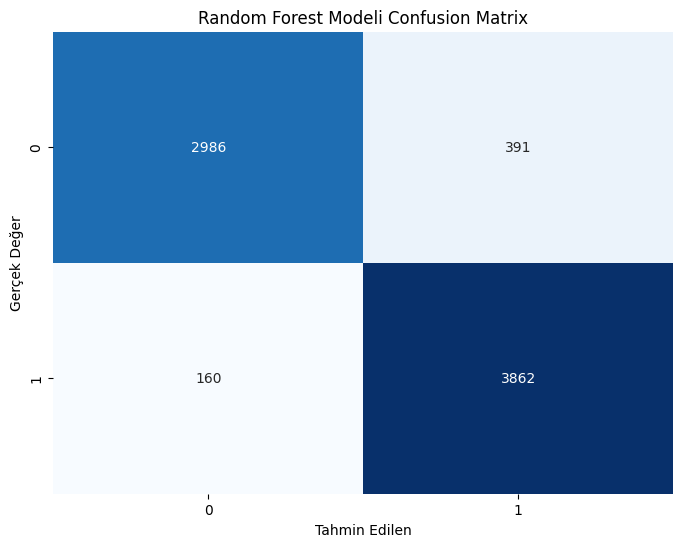

In [111]:
# Modelin performansını değerlendirecek confusion matrix görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_binary), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Modeli Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show()

## 14.2. Raporlama

In [112]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      3377
           1       0.91      0.96      0.93      4022

    accuracy                           0.93      7399
   macro avg       0.93      0.92      0.92      7399
weighted avg       0.93      0.93      0.93      7399

